In [8]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Generate splits images

In [34]:
"""
Create the dataset
Crop images.TIF in split of 512x512x4 (RGBNIR)
"""

import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show #graficar el mapa


def splits_images(in_path,out_path,input_filename,output_filename,output_filename_npy,output_filename_npyblack):
    coordinates='{}-{},{}-{}'

    def get_tiles(ds, width=512, height=512):
        nols, nrows = ds.meta['width'], ds.meta['height']
        offsets = product(range(0, nols, width), range(0, nrows, height))
        big_window = windows.Window(col_off=0, row_off=0, width=nols, height=nrows)
        for col_off, row_off in  offsets:
            window =windows.Window(col_off=col_off, row_off=row_off, width=width, height=height).intersection(big_window)
            transform = windows.transform(window, ds.transform)  #partir
            yield window, transform


    with rio.open(os.path.join(in_path, input_filename)) as inds:
        tile_width, tile_height = 512, 512
        meta = inds.meta.copy()


        for window, transform in get_tiles(inds):

            meta['transform'] = transform
            meta['width'], meta['height'] = window.width, window.height
            outpath = os.path.join(out_path,output_filename.format(int(window.col_off), int(window.row_off)))
            outpath_npy = str(os.path.join(out_path,output_filename_npy.format(int(window.col_off), int(window.row_off))))
            outpath_npyblack = str(os.path.join(out_path,output_filename_npyblack.format(int(window.col_off), int(window.row_off))))


            if((int(window.width)==512) and (int(window.height)==512)):
                with rio.open(outpath, 'w', **meta) as outds:                
                    array=inds.read(window=window)
                    #print(np.shape(array))
                    sum_channels= np.sum(array,axis=0)
                    #print(sum_channels)
                    equals0=(sum_channels==0).astype(np.uint8)
                    #print('equals',np.sum(equals0)) #2621440
                    #print('equals',np.sum(equals0)) #2621440
                    sum_percent=np.sum(equals0)/(512*512)
                    #print(np.sum(equals0)/(512*512))
                    if np.sum(equals0)/(512*512) > 0.15 : #0.33
                         np.save(outpath_npyblack,array)                
                    else :
                        outds.write(array)     
                    #print(array.shape)
                        np.save(outpath_npy,array)


                input_id=str(output_filename.format(int(window.col_off), int(window.row_off)))     
                source_id=str(os.path.join(out_path,output_filename.format(int(window.col_off), int(window.row_off))))
                coordinates2= str(coordinates.format(int(window.row_off),int(window.row_off)+int(window.width),int(window.col_off),int(window.col_off)+int(window.height)))
                percent_black=str(sum_percent)
                
                myData = [[input_id, source_id, coordinates2,percent_black]] #2621440]]              
                myFile = open('splits_images.csv', 'a')
                with myFile:
                    writer = csv.writer(myFile)
                    writer.writerows(myData)  #list    


In [35]:
from pathlib import Path
import csv
import timeit
import rasterio
import rasterio as rio
import os
from itertools import product
from rasterio import windows


data_path = Path('imagenes')
out_path_images = '/home/jgonzalez/Test_2019/Test_network/data/train/images'

myData = [["input_id", "source_id", "coordinates(rows,col)", "porcentaje"]]              
myFile = open('splits_images.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(myData)  #list
####### Images ########################################################################################################
start = timeit.default_timer()
input_filename0  = 'imagen0/IMG_PER1_20170422154946_ORT_MS_003749.TIF'
output_filename0 = 'imagentif/rgbnir0{}-{}.tif'
output_filename_npy0 = 'rgbnir0{}-{}.npy'
output_filename_npyblack0 = 'rgbnir0{}-{}_b.npy'
splits_images(data_path,out_path_images,input_filename0,output_filename0,output_filename_npy0,output_filename_npyblack0)

end = timeit.default_timer()
print("elapsed time: {}".format(end-start))


input_filename1  = 'imagen1/IMG_PER1_20170422154946_ORT_MS_003131.TIF'
output_filename1 = 'imagentif/rgbnir1{}-{}.tif'
output_filename_npy1 = 'rgbnir1{}-{}.npy'
output_filename_npyblack1 = 'rgbnir1{}-{}_b.npy'
splits_images(data_path,out_path_images,input_filename1,output_filename1,output_filename_npy1,output_filename_npyblack1)

input_filename2  = 'imagen2/IMG_PER1_20170422154946_ORT_MS_002513.TIF'
output_filename2 = 'imagentif/rgbnir2{}-{}.tif'
output_filename_npy2 = 'rgbnir2{}-{}.npy'
output_filename_npyblack2 = 'rgbnir2{}-{}_b.npy'
splits_images(data_path,out_path_images,input_filename2,output_filename2,output_filename_npy2,output_filename_npyblack2)

input_filename3  = 'imagen3/IMG_PER1_20190703144250_ORT_MS_000672.TIF'
output_filename3 = 'imagentif/rgbnir3{}-{}.tif'
output_filename_npy3 = 'rgbnir3{}-{}.npy'
output_filename_npyblack3 = 'rgbnir3{}-{}_b.npy'
splits_images(data_path,out_path_images,input_filename3,output_filename3,output_filename_npy3,output_filename_npyblack3)

input_filename4  = 'imagen4/IMG_PER1_20190703144250_ORT_MS_001290.TIF'
output_filename4 = 'imagentif/rgbnir4{}-{}.tif'
output_filename_npy4 = 'rgbnir4{}-{}.npy'
output_filename_npyblack4 = 'rgbnir4{}-{}_b.npy'
splits_images(data_path,out_path_images,input_filename4,output_filename4,output_filename_npy4,output_filename_npyblack4)

input_filename5 = 'imagen5/IMG_PER1_20190703144250_ORT_MS_002526.TIF'
output_filename5= 'imagentif/rgbnir5{}-{}.tif'
output_filename_npy5= 'rgbnir5{}-{}.npy'
output_filename_npyblack5 = 'rgbnir5{}-{}_b.npy'
data_generating(data_path,out_path_images,input_filename5,output_filename5,output_filename_npy5,output_filename_npyblack5)


elapsed time: 1.0685627670027316


In [40]:
!python splitsImages.py 

elapsed time: 0.986103987088427


# Generating Masks

In [44]:
#Cortar las imagenes TIF RGBNIR
import os
from itertools import product
import rasterio as rio
from rasterio import windows
from pathlib import Path
import csv
import numpy as np

def splits_masks(in_path,out_path,input_filename,output_filename,output_filename_npy):

    coordinates='{}-{},{}-{}'

    def get_tiles2(ds, width=512, height=512):
        nols, nrows = ds.meta['width'], ds.meta['height']
        offsets = product(range(0, nols, width), range(0, nrows, height))
        big_window = windows.Window(col_off=0, row_off=0, width=nols, height=nrows)
        for col_off, row_off in  offsets:
            window =windows.Window(col_off=col_off, row_off=row_off, width=width, height=height).intersection(big_window)
            transform = windows.transform(window, ds.transform)  #partir
            yield window, transform


    with rio.open(os.path.join(in_path, input_filename)) as inds:
        tile_width, tile_height = 512, 512
        meta = inds.meta.copy()


        for window, transform in get_tiles2(inds):

            meta['transform'] = transform
            meta['width'], meta['height'] = window.width, window.height
            outpath = os.path.join(out_path,output_filename.format(int(window.col_off), int(window.row_off)))
            outpath_npy = str(os.path.join(out_path,output_filename_npy.format(int(window.col_off), int(window.row_off))))


            if((int(window.width)==512) and (int(window.height)==512)):
                with rio.open(outpath, 'w', **meta) as outds:                
                    array=inds.read(window=window)
                    outds.write(array)     
                    #print(array.shape)
                    np.save(outpath_npy,array)


                input_id=str(output_filename.format(int(window.col_off), int(window.row_off)))     
                source_id=str(os.path.join(out_path,output_filename.format(int(window.col_off), int(window.row_off))))
                coordinates2= str(coordinates.format(int(window.row_off),int(window.row_off)+int(window.width),int(window.col_off),int(window.col_off)+int(window.height)))

                myData = [[input_id, source_id, coordinates2,]]              
                myFile = open('splits_masks.csv', 'a')
                with myFile:
                    writer = csv.writer(myFile)
                    writer.writerows(myData)  #list    

In [45]:
"""
Create the dataset MASK
Crop masks.TIF in split of 512x512x1 
"""
from pathlib import Path
import timeit
import csv
#from cropMasks import splits_masks


mask_path = Path('imagenes')
out_path_mask= '/home/jgonzalez/Test_2019/Test_network/data/train/masks'
myData = [["input_id", "source_id", "coordinates(rows,col)"]] 

myFile = open('splits_masks.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(myData)  
    
    
input_filename0 = 'imagen0/maskout0.tif'
output_filename0 = 'masktif/rgbnir0{}-{}_a.tif'
output_filename_npy0 = 'rgbnir0{}-{}_a.npy'
splits_masks(mask_path,out_path_mask,input_filename0,output_filename0,output_filename_npy0)


input_filename1 = 'imagen1/maskout1.tif'
output_filename1 = 'masktif/rgbnir1{}-{}_a.tif'
output_filename_npy1 = 'rgbnir1{}-{}_a.npy'
splits_masks(mask_path,out_path_mask,input_filename1,output_filename1,output_filename_npy1)

input_filename2 = 'imagen2/maskout2.tif'
output_filename2 = 'masktif/rgbnir2{}-{}_a.tif'
output_filename_npy2 = 'rgbnir2{}-{}_a.npy'
splits_masks(mask_path,out_path_mask,input_filename2,output_filename2,output_filename_npy2)

input_filename3 = 'imagen3/maskout3.tif'
output_filename3 = 'masktif/rgbnir3{}-{}_a.tif'
output_filename_npy3 = 'rgbnir3{}-{}_a.npy'
splits_masks(mask_path,out_path_mask,input_filename3,output_filename3,output_filename_npy3)

input_filename4 = 'imagen4/maskout4.tif'
output_filename4 = 'masktif/rgbnir4{}-{}_a.tif'
output_filename_npy4 = 'rgbnir4{}-{}_a.npy'
splits_masks(mask_path,out_path_mask,input_filename4,output_filename4,output_filename_npy4)

input_filename5 = 'imagen5/maskout5.tif'
output_filename5 = 'masktif/rgbnir5{}-{}_a.tif'
output_filename_npy5 = 'rgbnir5{}-{}_a.npy'
splits_masks(mask_path,out_path_mask,input_filename5,output_filename5,output_filename_npy5)
#######################################################################################################################

In [47]:
!python splitsMasks.py 

# Max Value

In [26]:
# read all bands
def maxvalue(root):
    datasetRGBNIR = rasterio.open(root)
    print(datasetRGBNIR)
    datasetRGBNIR.indexes

    array = datasetRGBNIR.read()


    stats = []
    for band in array:
        stats.append({
            'min': band.min(),
            'mean': band.mean(),
            'median': np.median(band),
            'max': band.max()})

    # Mostrar stado de cada banda
    print(stats)

    maxValue=np.max(array)
    print('type:',array.dtype,'max', maxValue)
    print('shape',array.shape)
    return maxValue

In [30]:
import rasterio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path


in_path = Path('imagenes')

input_filename0  = 'imagen0/IMG_PER1_20170422154946_ORT_MS_003749.TIF'
input_filename1  = 'imagen1/IMG_PER1_20170422154946_ORT_MS_003131.TIF'
input_filename2  = 'imagen2/IMG_PER1_20170422154946_ORT_MS_002513.TIF'
input_filename3  = 'imagen3/IMG_PER1_20190703144250_ORT_MS_000672.TIF'
input_filename4  = 'imagen4/IMG_PER1_20190703144250_ORT_MS_001290.TIF'
input_filename5 = 'imagen5/IMG_PER1_20190703144250_ORT_MS_002526.TIF'
array_max=[]

root0=str(os.path.join(in_path, input_filename0))
max0= maxvalue(root0)
array_max.append(max0)

root1=str(os.path.join(in_path, input_filename1))
max1= maxvalue(root1)
array_max.append(max1)

root2=str(os.path.join(in_path, input_filename2))
max2= maxvalue(root2)
array_max.append(max2)

root3=str(os.path.join(in_path, input_filename3))
max3= maxvalue(root3)
array_max.append(max3)

root4=str(os.path.join(in_path, input_filename4))
max4= maxvalue(root4)
array_max.append(max4)

root5=str(os.path.join(in_path, input_filename5))
max5= maxvalue(root5)
array_max.append(max5)

print('array', array_max, 'max', np.max(array_max))


<open DatasetReader name='imagenes/imagen0/IMG_PER1_20170422154946_ORT_MS_003749.TIF' mode='r'>
[{'min': 0, 'mean': 547.9330568204905, 'median': 728.0, 'max': 2182}, {'min': 0, 'mean': 475.55588162668363, 'median': 634.0, 'max': 1834}, {'min': 0, 'mean': 471.7584713779997, 'median': 634.0, 'max': 1757}, {'min': 0, 'mean': 588.059770878737, 'median': 849.0, 'max': 2160}]
type: uint16 max 2182
shape (4, 6361, 6329)
<open DatasetReader name='imagenes/imagen1/IMG_PER1_20170422154946_ORT_MS_003131.TIF' mode='r'>
[{'min': 0, 'mean': 541.6671241287386, 'median': 669.0, 'max': 1718}, {'min': 0, 'mean': 468.6707350247538, 'median': 587.0, 'max': 1421}, {'min': 0, 'mean': 471.41784467714433, 'median': 601.0, 'max': 1423}, {'min': 0, 'mean': 561.0690648564373, 'median': 794.0, 'max': 1714}]
type: uint16 max 1718
shape (4, 6366, 6367)
<open DatasetReader name='imagenes/imagen2/IMG_PER1_20170422154946_ORT_MS_002513.TIF' mode='r'>
[{'min': 0, 'mean': 482.95130900943366, 'median': 548.0, 'max': 1845}

In [46]:
!python maxvalue.py

<open DatasetReader name='imagenes/imagen0/IMG_PER1_20170422154946_ORT_MS_003749.TIF' mode='r'>
<open DatasetReader name='imagenes/imagen1/IMG_PER1_20170422154946_ORT_MS_003131.TIF' mode='r'>
<open DatasetReader name='imagenes/imagen2/IMG_PER1_20170422154946_ORT_MS_002513.TIF' mode='r'>
<open DatasetReader name='imagenes/imagen3/IMG_PER1_20190703144250_ORT_MS_000672.TIF' mode='r'>
<open DatasetReader name='imagenes/imagen4/IMG_PER1_20190703144250_ORT_MS_001290.TIF' mode='r'>
<open DatasetReader name='imagenes/imagen5/IMG_PER1_20190703144250_ORT_MS_002526.TIF' mode='r'>
array [2182, 1718, 1845, 3413, 3327, 3296] max 3413


# end 

In [34]:
RGBNIR  = 'imagenes/imagen0/IMG_PER1_20170422154946_ORT_MS_003749.TIF'

arrayRGB2 = rasterio.open(RGBNIR)
arrayRGB2.indexes



(1, 2, 3, 4)

shape (4, 6361, 6329)


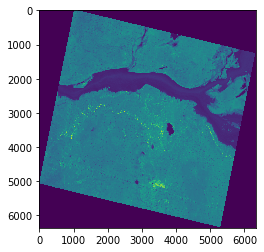

In [43]:
arrayRGB = arrayRGB2.read()/2182
print('shape', arrayRGB.shape)
plt.imshow(arrayRGB[-1])

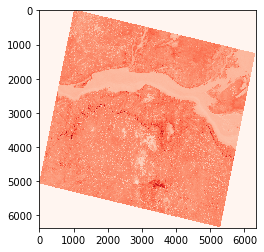

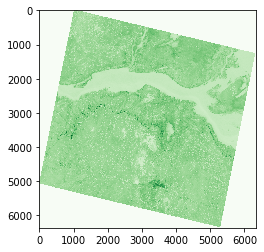

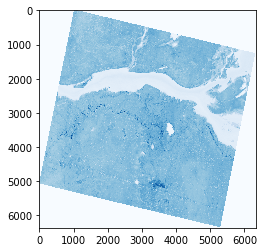

In [45]:
plt.imshow(arrayRGB[1,:,:], cmap='Reds') #igual al show
plt.show()
plt.imshow(arrayRGB[2,:,:], cmap='Greens')
plt.show()
plt.imshow(arrayRGB[3,:,:], cmap='Blues')
plt.show()